# Gamepad

https://inputs.readthedocs.io/en/latest/user/quickstart.html

## PS4 DualShock 4 Controller
Install the Windows driver from http://ds4windows.com/

In [2]:
!pip install inputs

  Using cached inputs-0.5-py2.py3-none-any.whl (33 kB)
You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
from inputs import devices

In [2]:
for device in devices:
    print(device)

Microsoft Keyboard
Microsoft Mouse
Microsoft X-Box 360 pad


In [3]:
devices.gamepads

[inputs.GamePad("/dev/input/by_id/usb-Microsoft_Corporation_Controller_0-event-joystick")]

In [ ]:
# from inputs import get_gamepad
# while 1:
#      events = get_gamepad()
#      for event in events:
#          print(event.ev_type, event.code, event.state)

In [1]:
import pandas as pd

In [2]:
header = ["img","x", "y", "a", "b", "rb"]
df = pd.read_csv("samples/data.csv",names=header)
df

,img,x,y,a,b,rb
0,samples/img_0.png,0.000000,-0.007874,0,0,0
1,samples/img_1.png,-0.007874,-0.015747,1,0,0
2,samples/img_2.png,-0.007874,-0.015747,1,0,0
3,samples/img_3.png,0.000000,-0.015747,1,0,0
4,samples/img_4.png,0.000000,-0.015747,1,0,0
...,...,...,...,...,...,...
469,samples/img_469.png,-0.007874,-0.015747,0,0,0
470,samples/img_470.png,-0.007874,-0.015747,0,0,0
471,samples/img_471.png,-0.007874,-0.023621,0,0,0
472,samples/img_472.png,-0.007874,-0.015747,0,0,0


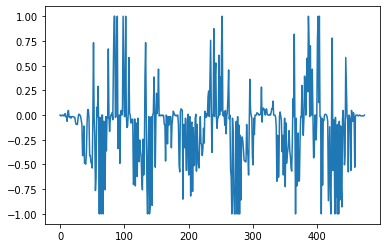

In [3]:
df.x.plot()

## Record / Utils

In [1]:
from utils import Screenshot, Controller

IMAGE_SIZE = (320, 240)
IDLE_SAMPLE_RATE = 1500
SAMPLE_RATE = 200

Screenshot with mss

https://python-mss.readthedocs.io/examples.html

In [7]:
import mss
with mss.mss() as sct:
    for i in range(10):
        filename = sct.shot(output="printscreen-"+str(i)+".png")
        print(filename)

printscreen-0.png
printscreen-1.png
printscreen-2.png
printscreen-3.png
printscreen-4.png
printscreen-5.png
printscreen-6.png
printscreen-7.png
printscreen-8.png
printscreen-9.png


In [10]:
# import record

# record.MainWindow.take_screenshot(self=mss.mss())

[Part of the screen](https://python-mss.readthedocs.io/examples.html?highlight=sct#part-of-the-screen)

In [15]:
import mss
import mss.tools


with mss.mss() as sct:
    # The screen part to capture
    monitor = {"top": 160, "left": 160, "width": 160, "height": 135}
    output = "sct-{top}x{left}_{width}x{height}.png".format(**monitor)

    # Grab the data
    sct_img = sct.grab(monitor)

    # Save to the picture file
    mss.tools.to_png(sct_img.rgb, sct_img.size, output=output)
    print(output)

sct-160x160_160x135.png


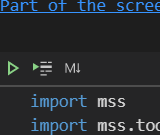

In [16]:
from IPython.display import Image
Image(filename=output)

take_screenshot method of class MainWindow

In [17]:
sct = mss.mss()

In [18]:
# Get raw pixels from the screen
sct_img = sct.grab({"top": Screenshot.OFFSET_Y,
                    "left": Screenshot.OFFSET_X,
                    "width": Screenshot.SRC_W,
                    "height": Screenshot.SRC_H})

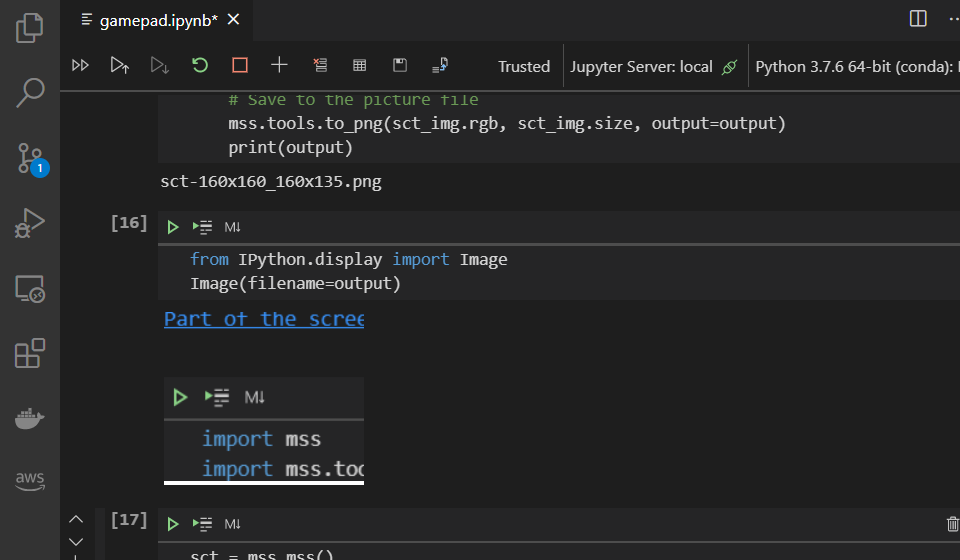

In [19]:
from PIL import ImageTk, Image
Image.frombytes('RGB', sct_img.size, sct_img.bgra, 'raw', 'BGRX')

Tkinter https://docs.python.org/3/library/tkinter.html

https://realpython.com/python-gui-tkinter/

https://www.geeksforgeeks.org/python-after-method-in-tkinter/